In [1]:
# Required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt, font_manager
import matplotlib as mpl
from matplotlib.pyplot import Normalize
from matplotlib.patches import Circle, Rectangle, Arc
import seaborn as sns
plt.style.use('fivethirtyeight')
mypal = plt.rcParams['axes.prop_cycle'].by_key()['color'] # Grab the color pal

import os
import gc

MENS_DIR = 'google-cloud-ncaa-march-madness-2020-division-1-mens-tournament'

In [25]:
# THIS IS ALL DONE FROM THE HELP OF 
mens_events = []
for year in [ #2015, 2016, 2017, 
            2018,
            #2019
            ]:
    mens_events.append(pd.read_csv(f'{MENS_DIR}/MEvents{year}.csv'))
MEvents = pd.concat(mens_events)


MPlayers = pd.read_csv(f'{MENS_DIR}/MPlayers.csv')

In [26]:
# Area Mapping Names
area_mapping = {0: np.nan,
                1: 'under basket',
                2: 'in the paint',
                3: 'inside right wing',
                4: 'inside right',
                5: 'inside center',
                6: 'inside left',
                7: 'inside left wing',
                8: 'outside right wing',
                9: 'outside right',
                10: 'outside center',
                11: 'outside left',
                12: 'outside left wing',
                13: 'backcourt'}

MEvents['Area_Name'] = MEvents['Area'].map(area_mapping)


# Normalize X, Y positions for court dimentions
# Court is 50 feet wide and 94 feet end to end.
MEvents['X_'] = (MEvents['X'] * (94/100))
MEvents['Y_'] = (MEvents['Y'] * (50/100))


# Create Half Court X/Y Features for Plotting
# Mens
MEvents['X_half'] = MEvents['X']
MEvents.loc[MEvents['X'] > 50, 'X_half'] = (100 - MEvents['X'].loc[MEvents['X'] > 50])
MEvents['Y_half'] = MEvents['Y']
MEvents.loc[MEvents['X'] > 50, 'Y_half'] = (100 - MEvents['Y'].loc[MEvents['X'] > 50])

MEvents['X_half_'] = (MEvents['X_half'] * (94/100))
MEvents['Y_half_'] = (MEvents['Y_half'] * (50/100))


# Add Player Info
MEvents = MEvents.merge(MPlayers,
                        how='left',
                        left_on=['EventPlayerID'],
                        right_on='PlayerID')

In [27]:
def create_ncaa_half_court(ax=None, three_line='mens', court_color='#dfbb85',
                           lw=3, lines_color='black', lines_alpha=0.5,
                           paint_fill='blue', paint_alpha=0.4,
                          inner_arc=False):
    """
    Version 2020.2.19

    Creates NCAA Basketball Half Court
    Dimensions are in feet (Court is 97x50 ft)
    Created by: Rob Mulla / https://github.com/RobMulla

    * Note that this function uses "feet" as the unit of measure.
    * NCAA Data is provided on a x range: 0, 100 and y-range 0 to 100
    * To plot X/Y positions first convert to feet like this:
    ```
    Events['X_'] = (Events['X'] * (94/100))
    Events['Y_'] = (Events['Y'] * (50/100))
    ```
    ax: matplotlib axes if None gets current axes using `plt.gca`
    
    three_line: 'mens', 'womens' or 'both' defines 3 point line plotted
    court_color : (hex) Color of the court
    lw : line width
    lines_color : Color of the lines
    lines_alpha : transparency of lines
    paint_fill : Color inside the paint
    paint_alpha : transparency of the "paint"
    inner_arc : paint the dotted inner arc
    """
    if ax is None:
        ax = plt.gca()

    # Create Pathes for Court Lines
    center_circle = Circle((50/2, 94/2), 6,
                           linewidth=lw, color=lines_color, lw=lw,
                           fill=False, alpha=lines_alpha)
    hoop = Circle((50/2, 5.25), 1.5 / 2,
                       linewidth=lw, color=lines_color, lw=lw,
                       fill=False, alpha=lines_alpha)

    # Paint - 18 Feet 10 inches which converts to 18.833333 feet - gross!
    paint = Rectangle(((50/2)-6, 0), 12, 18.833333,
                           fill=paint_fill, alpha=paint_alpha,
                           lw=lw, edgecolor=None)
    
    paint_boarder = Rectangle(((50/2)-6, 0), 12, 18.833333,
                           fill=False, alpha=lines_alpha,
                           lw=lw, edgecolor=lines_color)
    
    arc = Arc((50/2, 18.833333), 12, 12, theta1=-
                   0, theta2=180, color=lines_color, lw=lw,
                   alpha=lines_alpha)
    
    block1 = Rectangle(((50/2)-6-0.666, 7), 0.666, 1, 
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    block2 = Rectangle(((50/2)+6, 7), 0.666, 1, 
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    ax.add_patch(block1)
    ax.add_patch(block2)
    
    l1 = Rectangle(((50/2)-6-0.666, 11), 0.666, 0.166,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    l2 = Rectangle(((50/2)-6-0.666, 14), 0.666, 0.166,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    l3 = Rectangle(((50/2)-6-0.666, 17), 0.666, 0.166,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    ax.add_patch(l1)
    ax.add_patch(l2)
    ax.add_patch(l3)
    l4 = Rectangle(((50/2)+6, 11), 0.666, 0.166,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    l5 = Rectangle(((50/2)+6, 14), 0.666, 0.166,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    l6 = Rectangle(((50/2)+6, 17), 0.666, 0.166,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    ax.add_patch(l4)
    ax.add_patch(l5)
    ax.add_patch(l6)
    
    # 3 Point Line
    if (three_line == 'mens') | (three_line == 'both'):
        # 22' 1.75" distance to center of hoop
        three_pt = Arc((50/2, 6.25), 44.291, 44.291, theta1=12,
                            theta2=168, color=lines_color, lw=lw,
                            alpha=lines_alpha)

        # 4.25 feet max to sideline for mens
        ax.plot((3.34, 3.34), (0, 11.20),
                color=lines_color, lw=lw, alpha=lines_alpha)
        ax.plot((50-3.34, 50-3.34), (0, 11.20),
                color=lines_color, lw=lw, alpha=lines_alpha)
        ax.add_patch(three_pt)

    if (three_line == 'womens') | (three_line == 'both'):
        # womens 3
        three_pt_w = Arc((50/2, 6.25), 20.75 * 2, 20.75 * 2, theta1=5,
                              theta2=175, color=lines_color, lw=lw, alpha=lines_alpha)
        # 4.25 inches max to sideline for mens
        ax.plot( (4.25, 4.25), (0, 8), color=lines_color,
                lw=lw, alpha=lines_alpha)
        ax.plot((50-4.25, 50-4.25), (0, 8.1),
                color=lines_color, lw=lw, alpha=lines_alpha)

        ax.add_patch(three_pt_w)

    # Add Patches
    ax.add_patch(paint)
    ax.add_patch(paint_boarder)
    ax.add_patch(center_circle)
    ax.add_patch(hoop)
    ax.add_patch(arc)
    
    if inner_arc:
        inner_arc = Arc((50/2, 18.833333), 12, 12, theta1=180,
                             theta2=0, color=lines_color, lw=lw,
                       alpha=lines_alpha, ls='--')
        ax.add_patch(inner_arc)

    # Restricted Area Marker
    restricted_area = Arc((50/2, 6.25), 8, 8, theta1=0,
                        theta2=180, color=lines_color, lw=lw,
                        alpha=lines_alpha)
    ax.add_patch(restricted_area)
    
    # Backboard
    ax.plot(((50/2) - 3, (50/2) + 3), (4, 4),
            color=lines_color, lw=lw*1.5, alpha=lines_alpha)
    ax.plot( (50/2, 50/2), (4.3, 4), color=lines_color,
            lw=lw, alpha=lines_alpha)

    # Half Court Line
    ax.axhline(94/2, color=lines_color, lw=lw, alpha=lines_alpha)

    
    # Plot Limit
    ax.set_xlim(0, 50)
    ax.set_ylim(0, 94/2 + 2)
    ax.set_facecolor(court_color)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    return ax

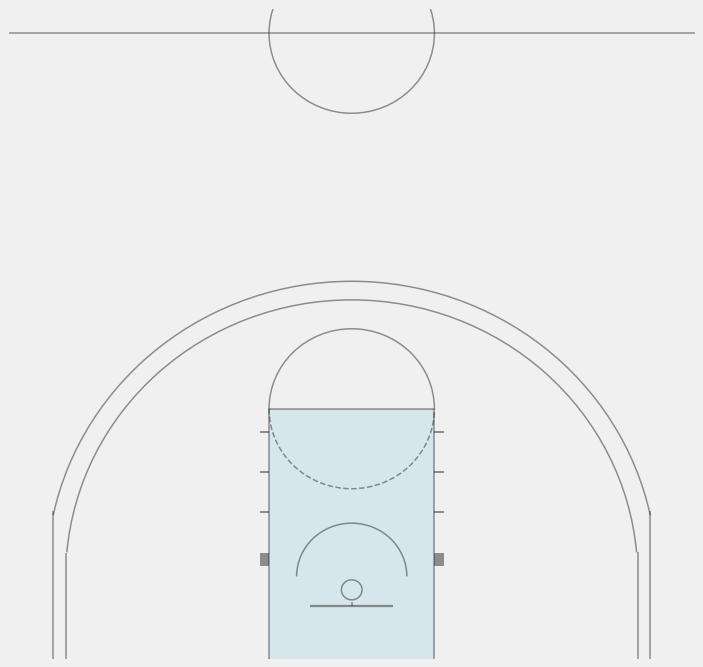

In [28]:
fig, ax = plt.subplots(figsize=(11, 11.2))
create_ncaa_half_court(three_line='both',
                       paint_alpha=0.1,
                       inner_arc=True,
                       court_color='#f0f0f0', 
                       paint_fill='#fc4f30', 
                       lines_color='#29292b',
                       lw=1.5)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Only one of 'bins' and 'norm' arguments can be supplied, ignoring bins=log
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Only one of 'bins' and 'norm' arguments can be supplied, ignoring bins=log


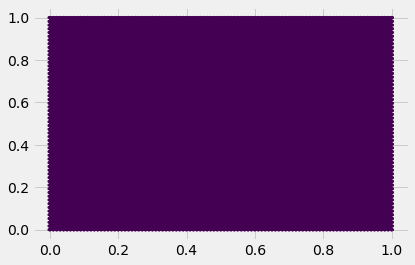

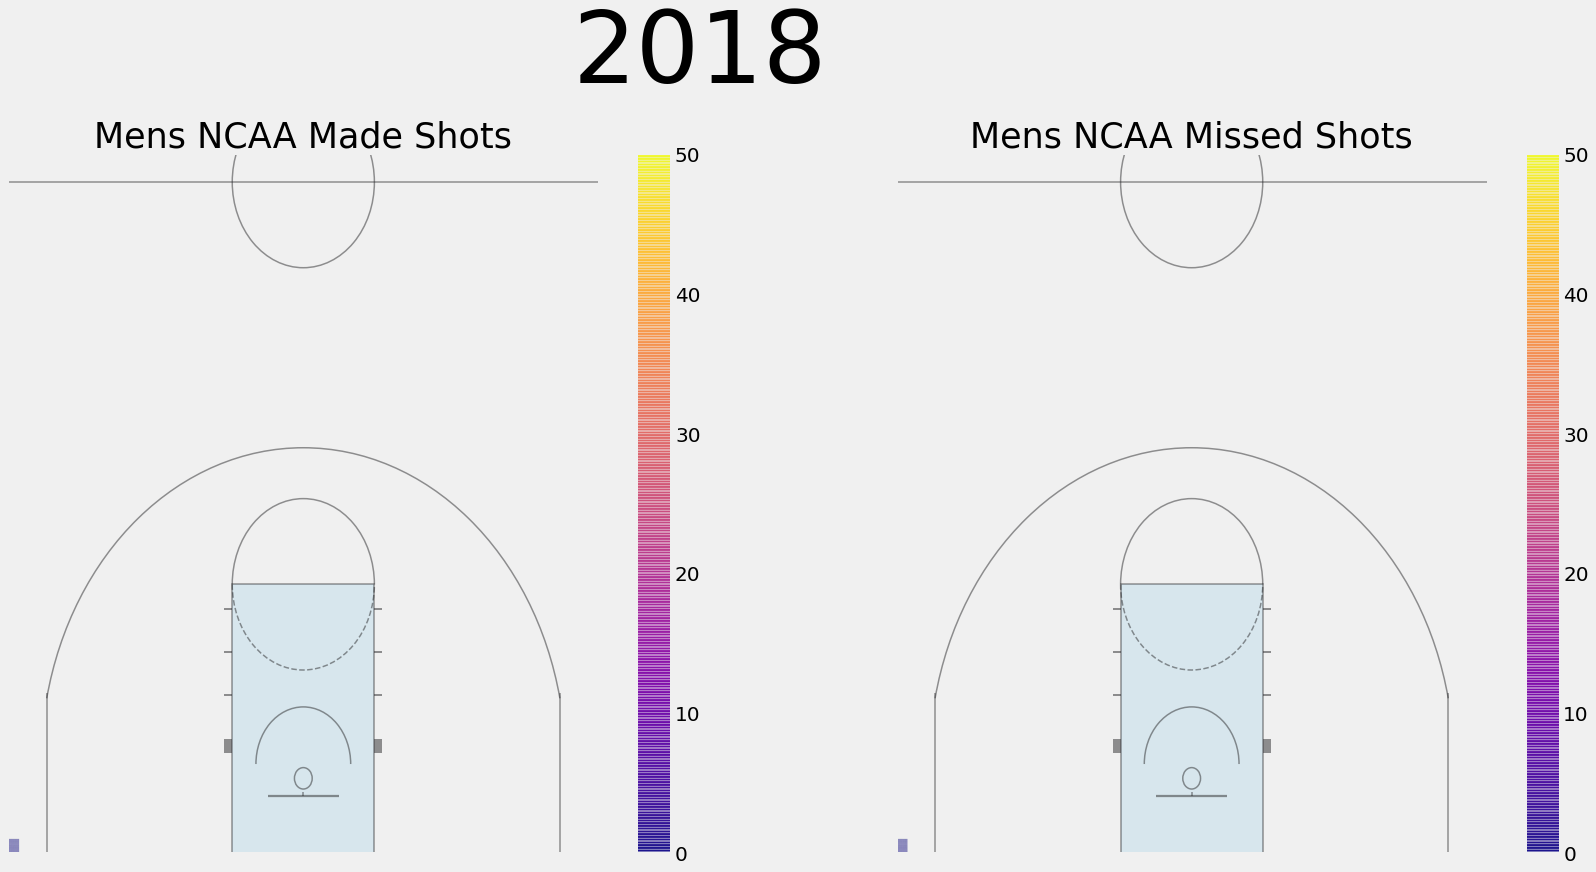

In [29]:
# Made and Missed shots dataframes
MadeShots = MEvents.query('EventType == "made2" or EventType == "made3"')
MissedShots = MEvents.query('EventType == "miss2" or EventType == "miss3"')

hb0 = plt.hexbin(x=MissedShots.query('Y_ != 0')['Y_half_'],
                 y=MissedShots.query('Y_ != 0')['X_half_'],)
min_v = hb0.norm.vmin
max_v = hb0.norm.vmax
norm_missed = Normalize(0, np.sqrt(max_v) + 50)

hb_0 = plt.hexbin(x=MadeShots.query('Y_ != 0')['Y_half_'],
                 y=MadeShots.query('Y_ != 0')['X_half_'],)
min_v2 = hb_0.norm.vmin
max_v2 = hb_0.norm.vmax
norm_made = Normalize(0, np.sqrt(max_v2)+50)



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(26, 12))
ax1 = create_ncaa_half_court(ax=ax1,
                            three_line='mens',
                            court_color='#f0f0f0', 
                            #paint_fill='#fc4f30', 
                            lines_color='#29292b',
                            lw=1.5,
                            paint_alpha=0.1,
                            inner_arc=True)

ax2 = create_ncaa_half_court(ax=ax2,
                            three_line='mens',
                            court_color='#f0f0f0', 
                            #paint_fill='#fc4f30', 
                            lines_color='#29292b',
                            lw=1.5,
                            paint_alpha=0.1,
                            inner_arc=True)

hb1 = ax1.hexbin(x=MadeShots.query('Y_ != 0')['Y_half_'],
                 y=MadeShots.query('Y_ != 0')['X_half_'],
                 gridsize=50, bins='log', 
                 cmap='plasma', alpha=0.5,
                 linewidths=None, edgecolors='none',
                 norm=norm_made
                )

hb2 = ax2.hexbin(x=MissedShots.query('Y_ != 0')['Y_half_'],
                 y=MissedShots.query('Y_ != 0')['X_half_'],
                 gridsize=50, bins='log', 
                 cmap='plasma', alpha=0.5,
                 linewidths=0, edgecolors='none',
                 norm=norm_made
                )


ax1.set_title('Mens NCAA Made Shots', size=35,
              fontname='sans'
             )
fig.suptitle('2018', fontsize=100, y=1.05, x=0.45,fontname='sans')
ax2.set_title('Mens NCAA Missed Shots', size=35,
              fontname='sans'
             )


cb1 = fig.colorbar(hb1, ax=ax1)
cb1.solids.set_edgecolor("face")
cb1.ax.tick_params(labelsize=20)
cb1 = fig.colorbar(hb2, ax=ax2)
cb1.solids.set_edgecolor("face")
cb1.ax.tick_params(labelsize=20)
#plt.tight_layout()
plt.show()

In [17]:
#fig.savefig('gif_viz/court_viz_2018.png')

In [30]:
MEvents['Y_half_'].nunique()

1